  # **Allstate Claims Severity**
####  **Data Exploration, Cleaning and Visualizations of Dataset**

The Allstate Corporation is the second largest personal lines insurer in the United States and the largest that is publicly held. Due to its large size, they have tackle a large number of claims which takes time done by a human. It is currently developing automated methods of predicting the cost, and hence severity, of claims. Simply, Let's predict how much the company will pay to an insuree.

In [33]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

## Importing the libraries and Reading the Data


In [34]:
#importing the  necessary modules
import pandas                                      #to read and manipulate data
import zipfile                                     #to extract data
import numpy as np                                 #for matrix operations
#rest will be imported as and when required
#read the train and test zip file
zip_ref = zipfile.ZipFile("train.csv.zip", 'r')    
zip_ref.extractall()                               
zip_ref.close()
train_data = pandas.read_csv("train.csv")

# Reading the Data:

In [35]:
#Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(train_data.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 

In [36]:
print(train_data.shape)  

(188318, 132)


### Creating a copy for testing and getting the data statistics.

In [37]:
#Let's copy the  training data so that we can create a  testing set.
import copy
test_data = copy.deepcopy(train_data.iloc[150000:])
train_data = train_data.iloc[:150000]

# Data Statistics:

- number of training datapoints given and features.
- Get the shape, skew of the data and also describe it.

In [38]:
 #number of training datapoints given and features.
print(train_data.shape)
print(test_data.shape)
#We can see that there are 188318 features and 132 attributes.

(150000, 132)
(38318, 132)


In [39]:
print(test_data.head(5))

            id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12  \
150000  467729    A    A    A    A    A    B    A    A    A     A     A     A   
150001  467734    A    B    A    A    B    A    A    A    B     B     A     A   
150002  467739    A    B    A    A    A    A    A    A    B     B     B     B   
150003  467740    A    A    A    A    A    B    A    A    A     A     A     A   
150004  467743    A    B    A    A    A    A    A    A    B     A     B     A   

       cat13 cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23  \
150000     A     A     A     A     A     A     A     A     A     A     A   
150001     B     A     A     A     A     A     A     A     A     A     A   
150002     B     A     A     A     A     A     A     A     A     A     A   
150003     A     A     A     A     A     A     A     A     A     A     A   
150004     A     A     A     A     A     A     A     A     A     A     A   

       cat24 cat25 cat26 cat27 cat28 cat29 cat30 cat31 c

- Skewness

In [40]:
# true variables 
y_true = test_data['loss']
# Skewness of the distribution
print(train_data.skew())

id       -0.004008
cont1     0.517909
cont2    -0.312079
cont3    -0.010250
cont4     0.415957
cont5     0.680679
cont6     0.464061
cont7     0.828456
cont8     0.679399
cont9     1.074892
cont10    0.356928
cont11    0.282640
cont12    0.293526
cont13    0.385175
cont14    0.243783
loss      3.901837
dtype: float64


- Describe

In [44]:
print(train_data.describe())                            

                  id          cont1          cont2          cont3  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean   234490.288887       0.493660       0.507320       0.498990   
std    134937.378713       0.187537       0.207229       0.202252   
min         1.000000       0.000016       0.001149       0.002634   
25%    117537.750000       0.346090       0.358319       0.336963   
50%    234497.500000       0.475784       0.555782       0.527991   
75%    351272.000000       0.623912       0.681761       0.634224   
max    467728.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.491802       0.487722       0.490615       0.484894   
std         0.211373       0.209136       0.205168       0.178525   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

## Data Visualization
 The loss is positively skewed. We  need to mormalize it later..
 

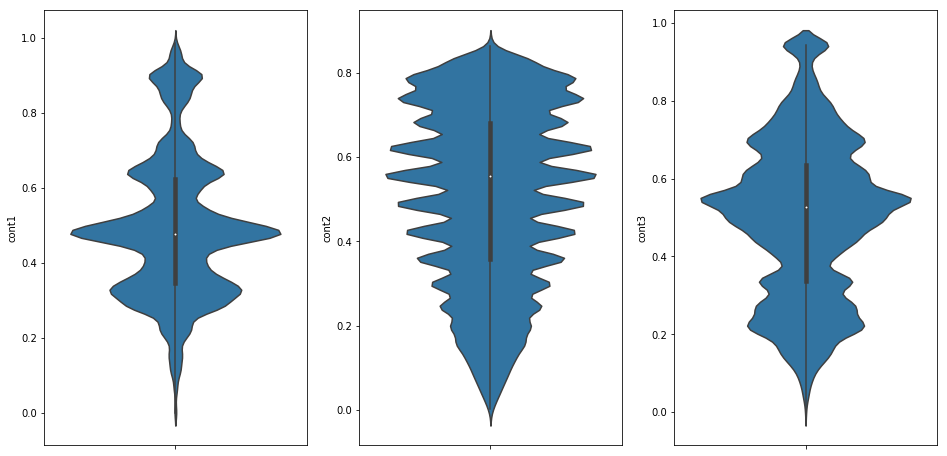

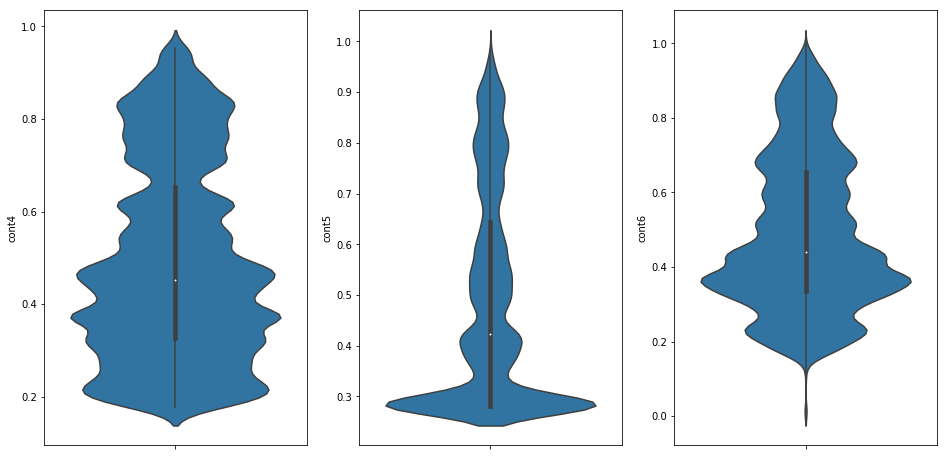

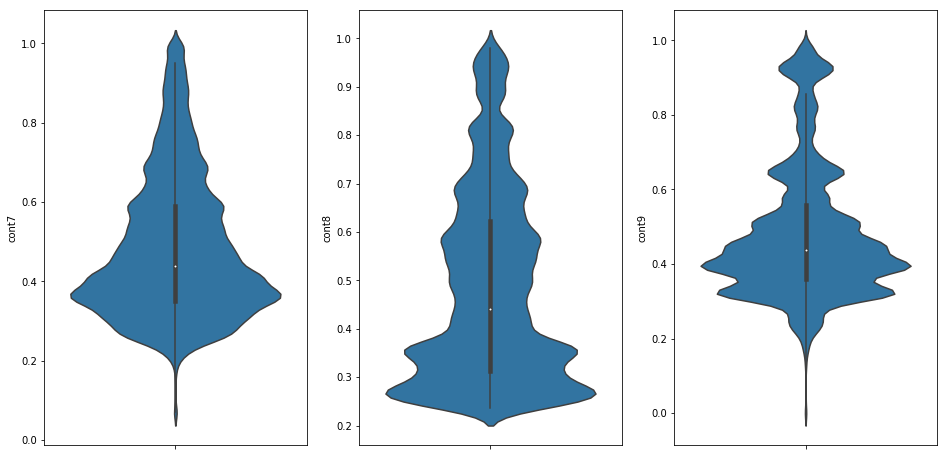

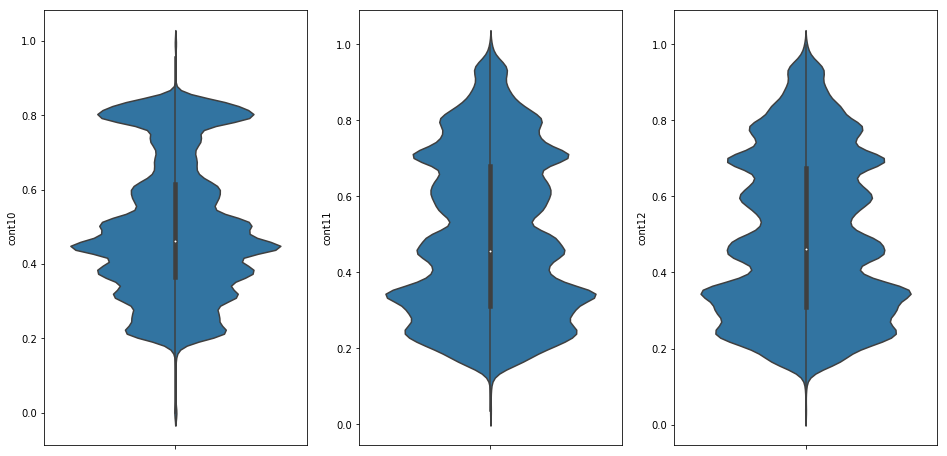

In [45]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
#range of features considered
split = 117

#number of features considered
size = 15

#create a dataframe with only continuous features
data=train_data.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 3
n_rows = 4

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(16, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=train_data, ax=ax[j])
plt.show()

Cont1 has many values close to 0.5. Cont2 has a pattern where there a several spikes at specific points. Cont5 has many values near 0.3. Cont14 has a distinct pattern. 0.22 and 0.82 have a lot of concentration. Loss distribution must be converted to normal.

In [46]:
# number of testing datapoints given and its features.
print(test_data.shape)                                 #

(38318, 132)


In [48]:
#The testing set have one less column than the training data. Which is what we want because the loss column contains the target variables.
#Let's print it to verify
print(test_data.head(5))

            id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12  \
150000  467729    A    A    A    A    A    B    A    A    A     A     A     A   
150001  467734    A    B    A    A    B    A    A    A    B     B     A     A   
150002  467739    A    B    A    A    A    A    A    A    B     B     B     B   
150003  467740    A    A    A    A    A    B    A    A    A     A     A     A   
150004  467743    A    B    A    A    A    A    A    A    B     A     B     A   

       cat13 cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23  \
150000     A     A     A     A     A     A     A     A     A     A     A   
150001     B     A     A     A     A     A     A     A     A     A     A   
150002     B     A     A     A     A     A     A     A     A     A     A   
150003     A     A     A     A     A     A     A     A     A     A     A   
150004     A     A     A     A     A     A     A     A     A     A     A   

       cat24 cat25 cat26 cat27 cat28 cat29 cat30 cat31 c

## Data Transformation
 - Skew correction

## Data Interaction
 - Kplot

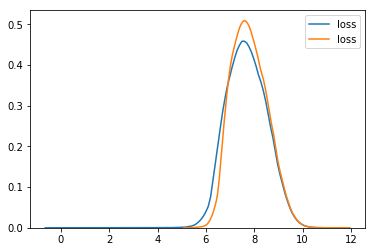

In [50]:
#shift is another hyper-parameter which give better performance
shift = 200

#without the log loss
ax = sns.kdeplot(np.log(train_data['loss']),legend= True)  
#with the log loss
ax = sns.kdeplot(np.log(train_data['loss']+shift),legend= True)                 

plt.show()

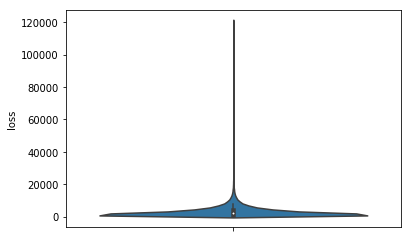

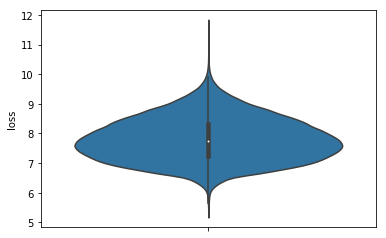

In [51]:
#getting the id column from test set which will be later used for submission
ids = test_data['id']

target = train_data['loss']

#drop the unnecessary column id and loss from both train and test set.
train_data.drop(['id','loss'],1,inplace=True)
test_data.drop(['id','loss'],1,inplace=True)

#violin plot to visualize loss before applying log transformation.
sns.violinplot(data=train_data,y=target)  
plt.show()

target = np.log(target+shift)

#violin plot to visualize loss after applying log transformation.
sns.violinplot(data=train_data,y=target)  
plt.show()

- Correlation

In [53]:

# Now that the loss has been normalized, We can proceed futher.We will find the correlation between different features.
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.81
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53



Strong correlation is observed between the following pairs. This represents an opportunity to reduce the feature set through transformations such as PCA.

Next, we count the number of different labels in each categorical feature.

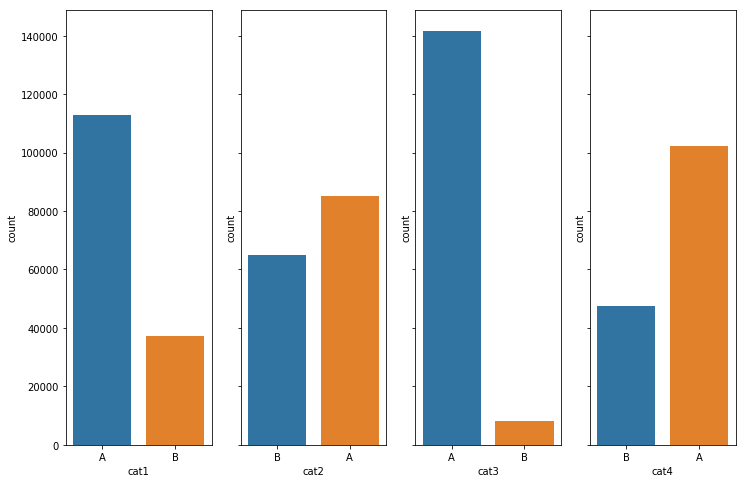

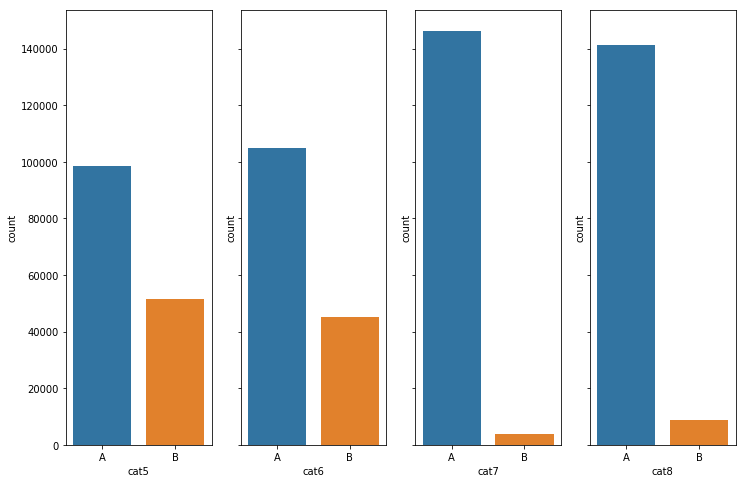

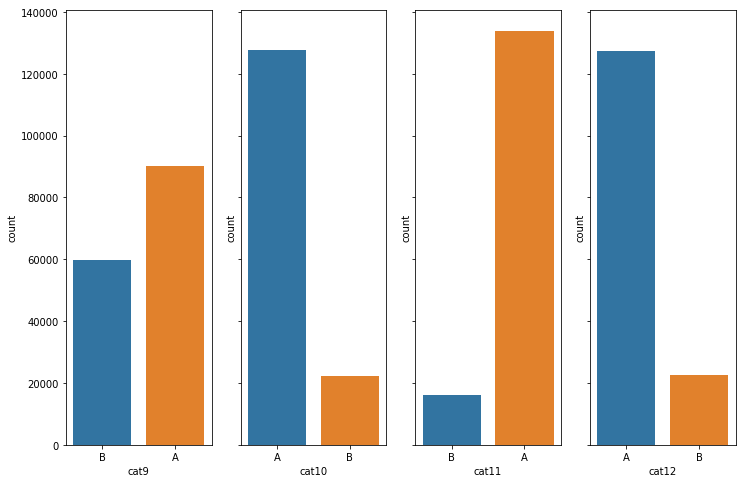

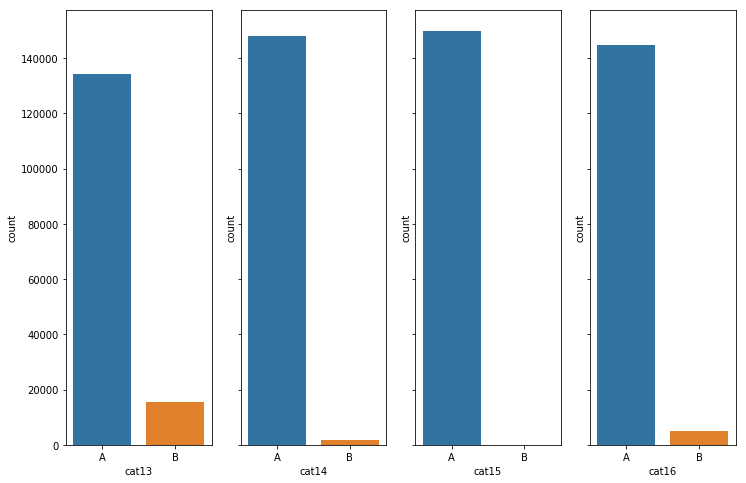

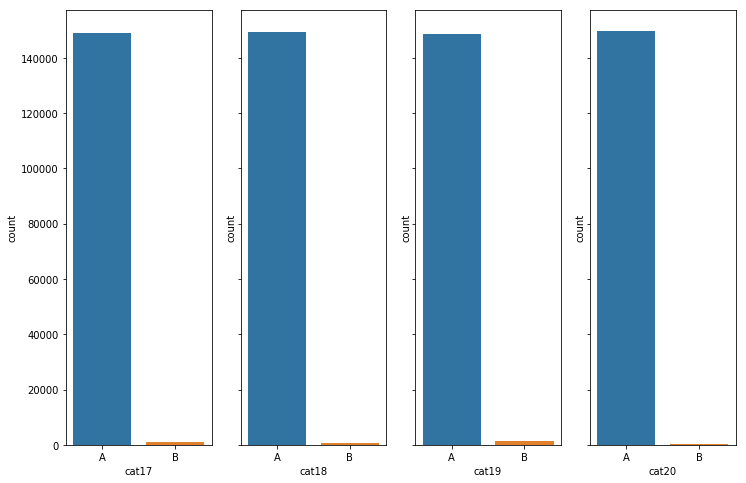

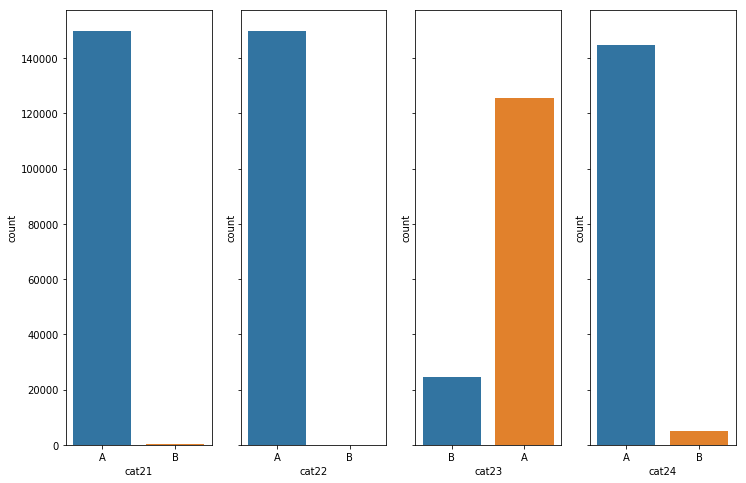

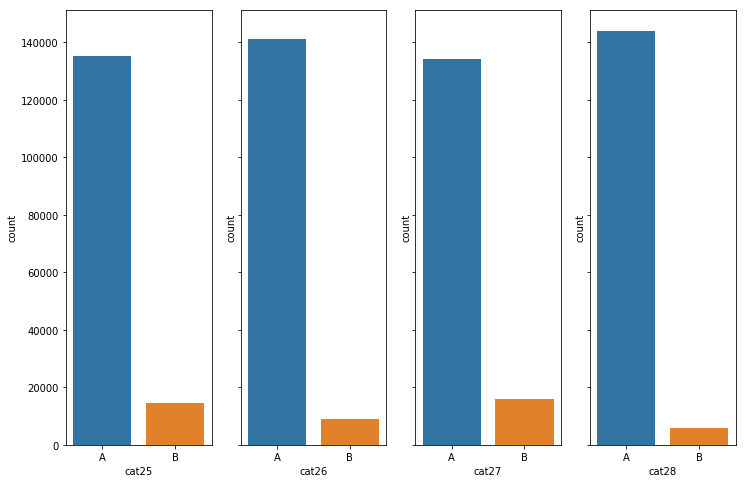

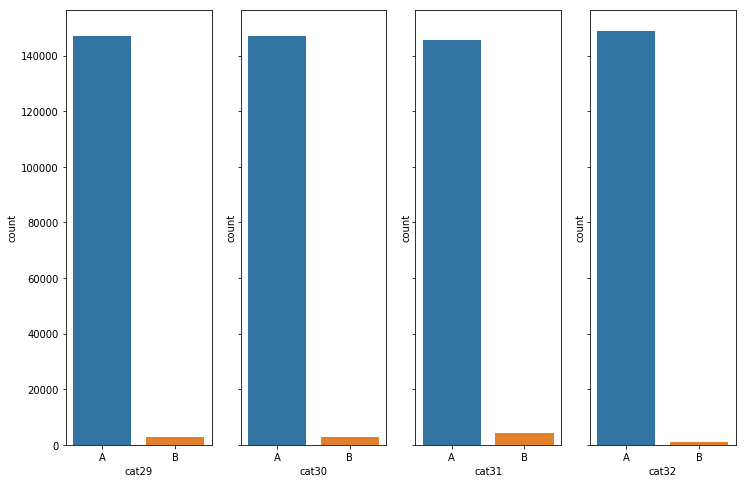

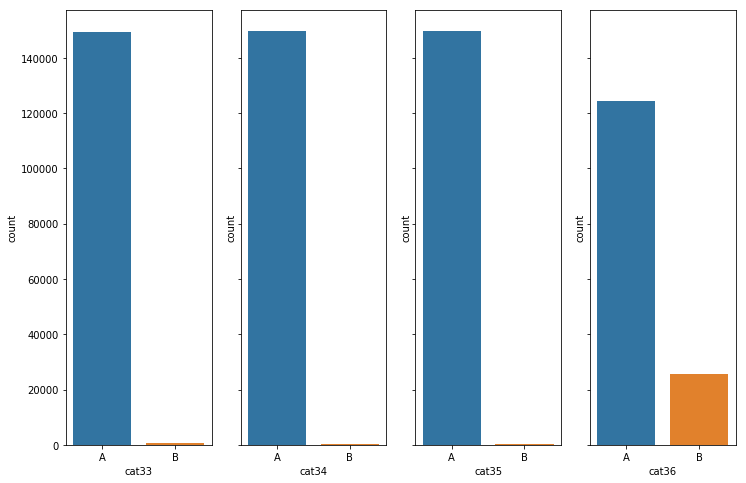

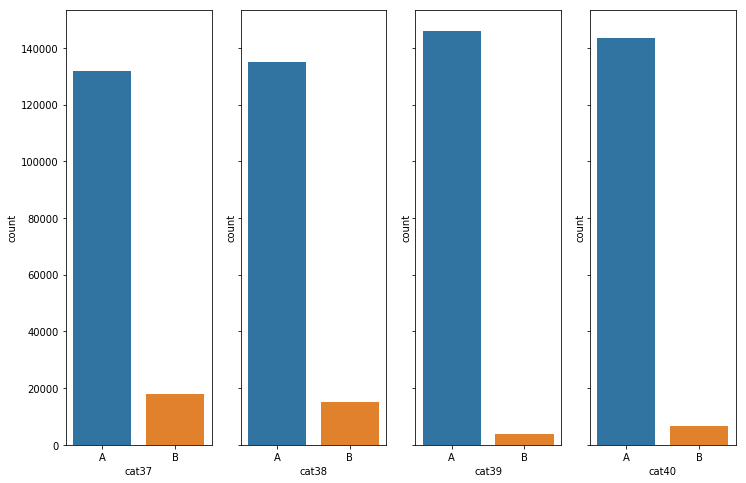

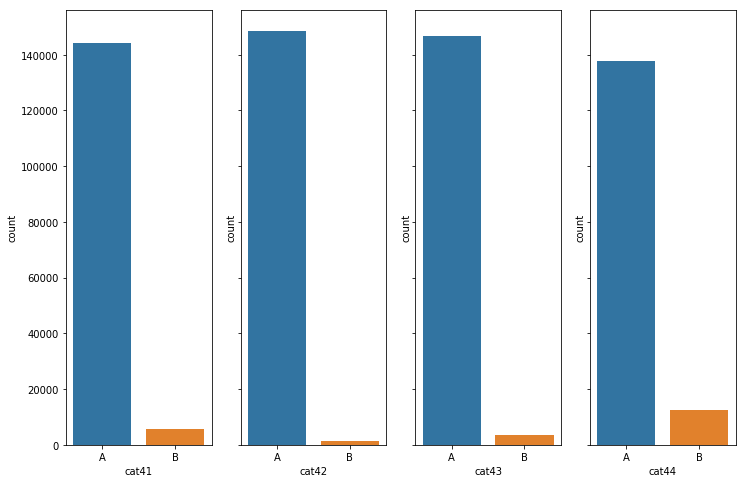

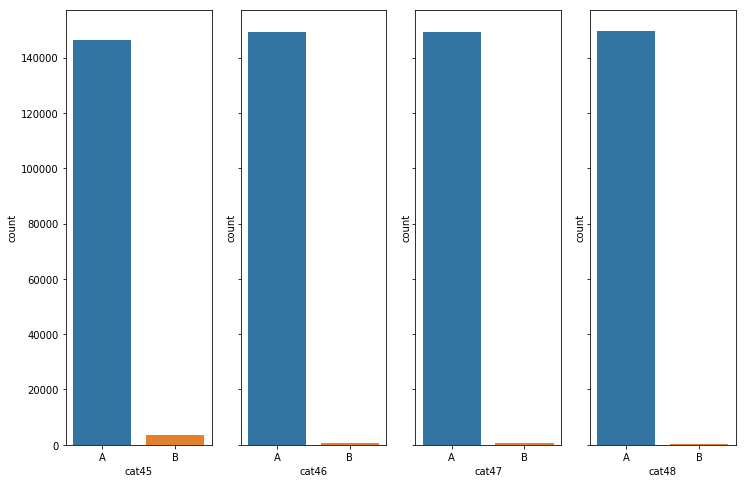

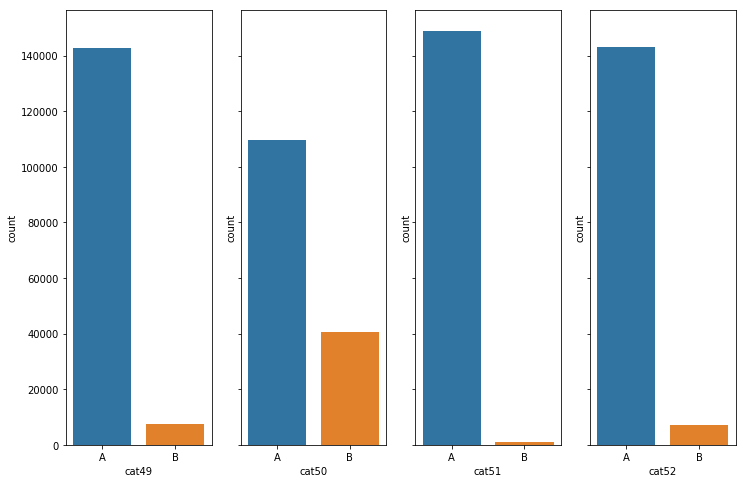

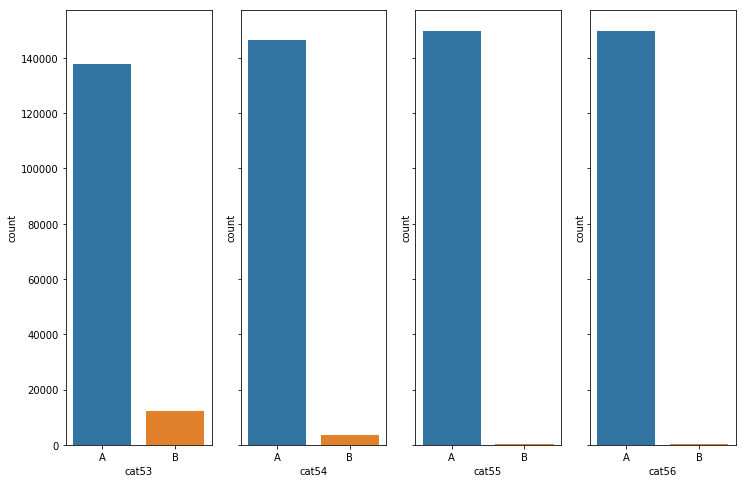

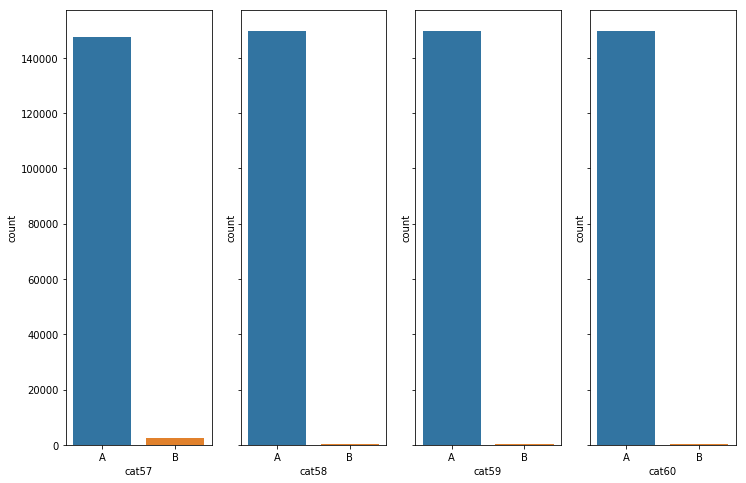

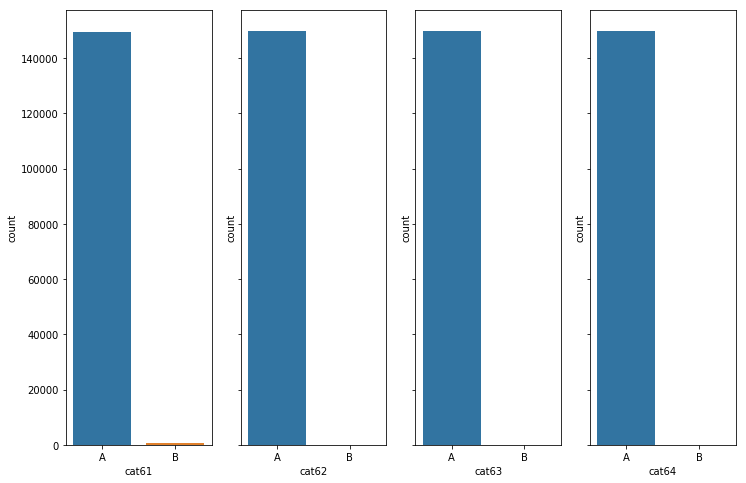

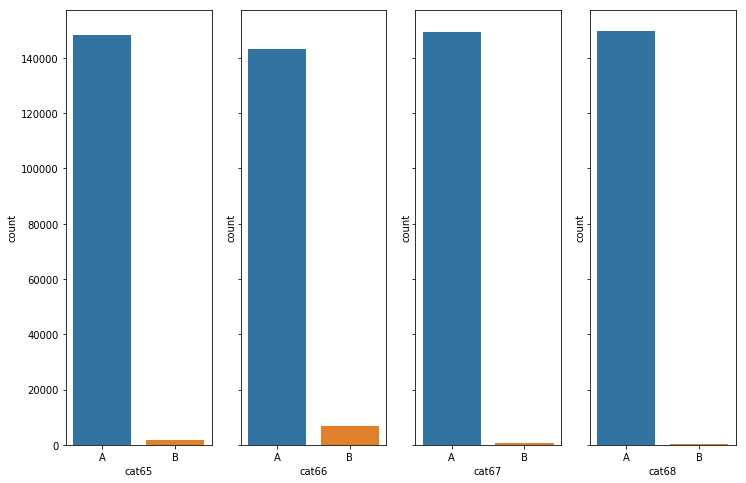

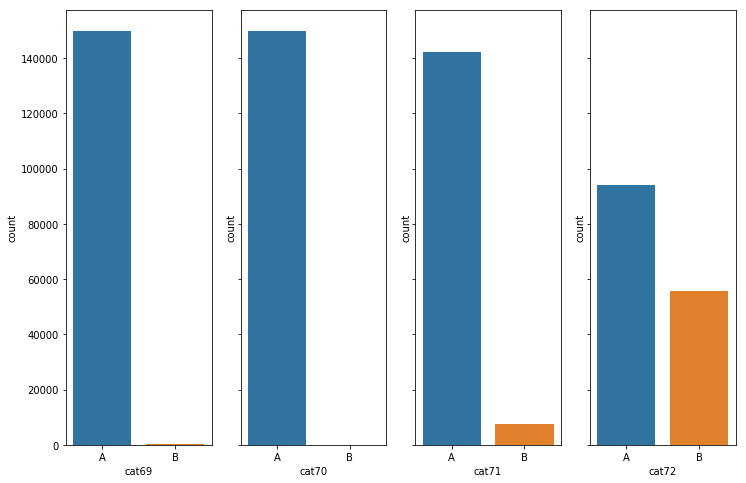

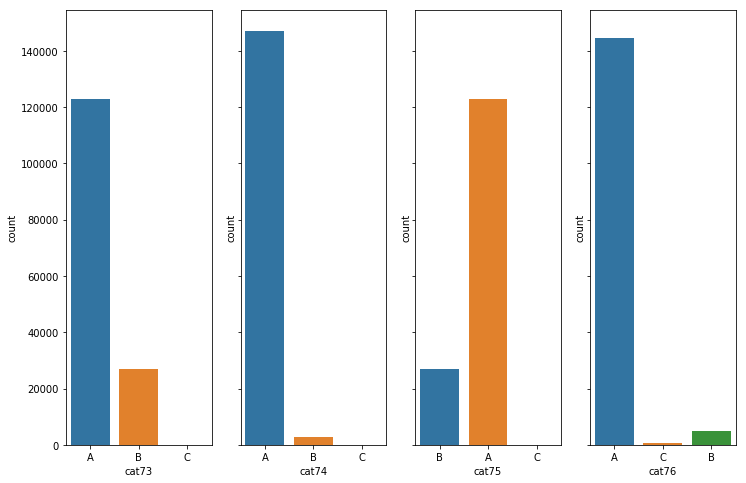

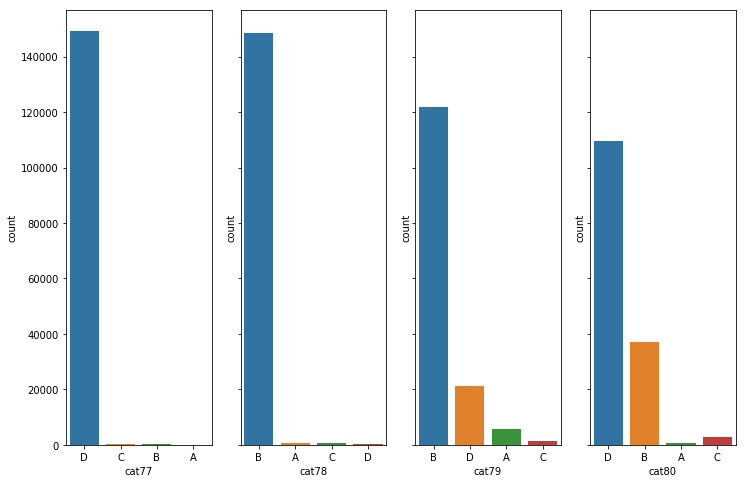

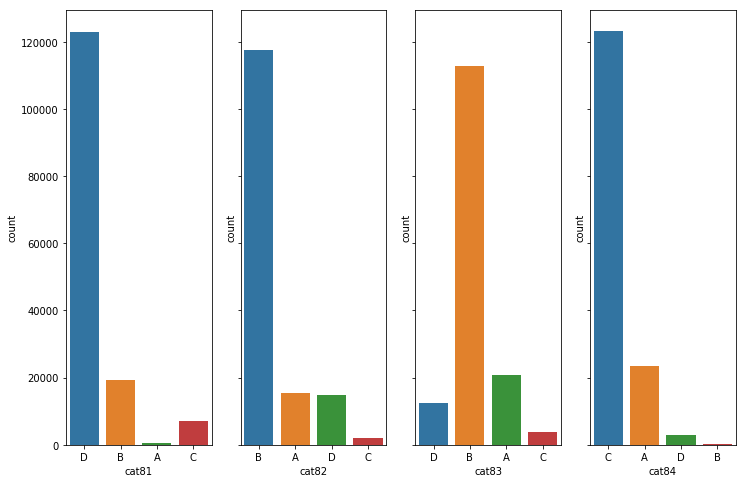

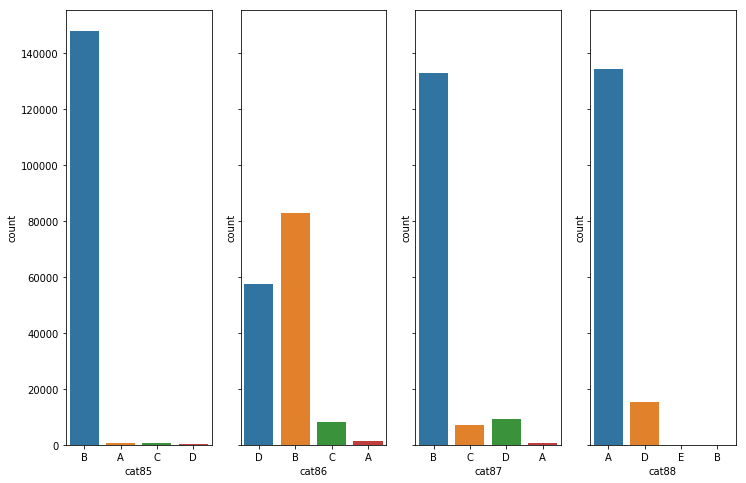

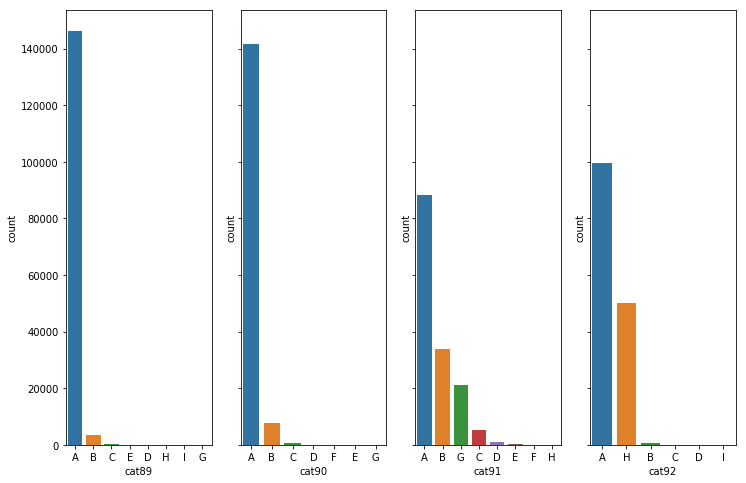

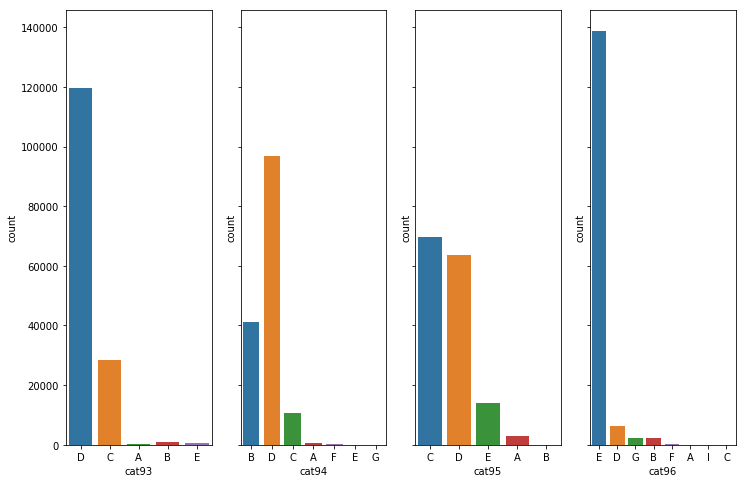

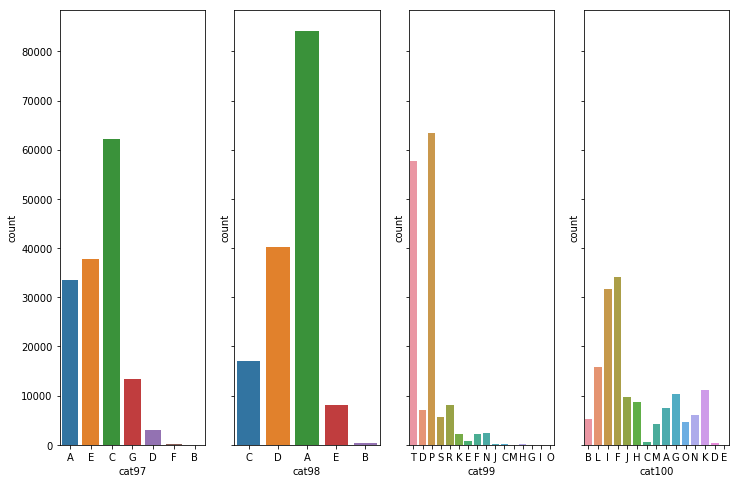

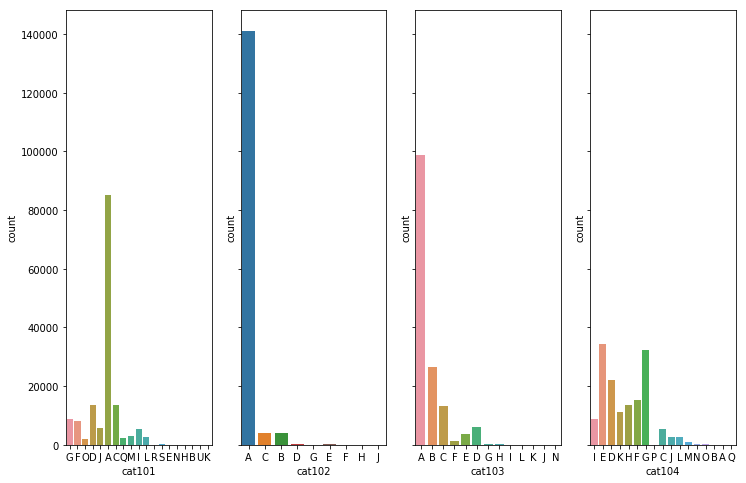

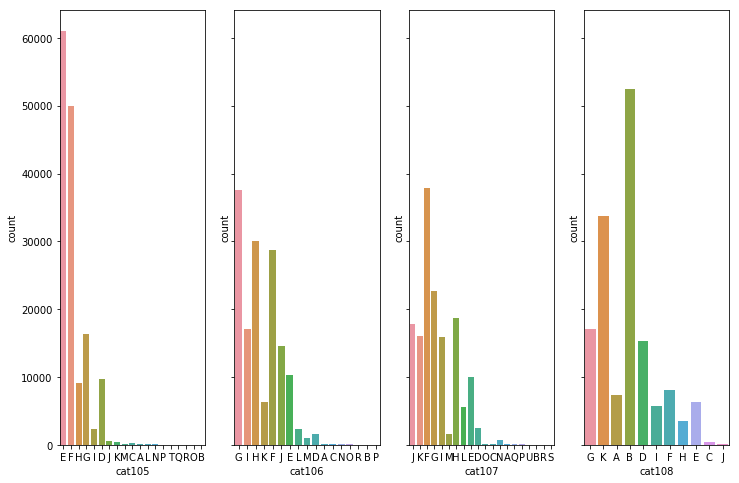

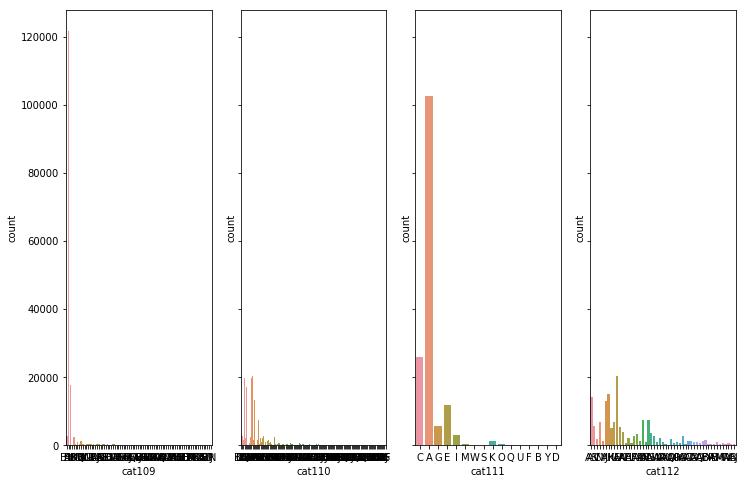

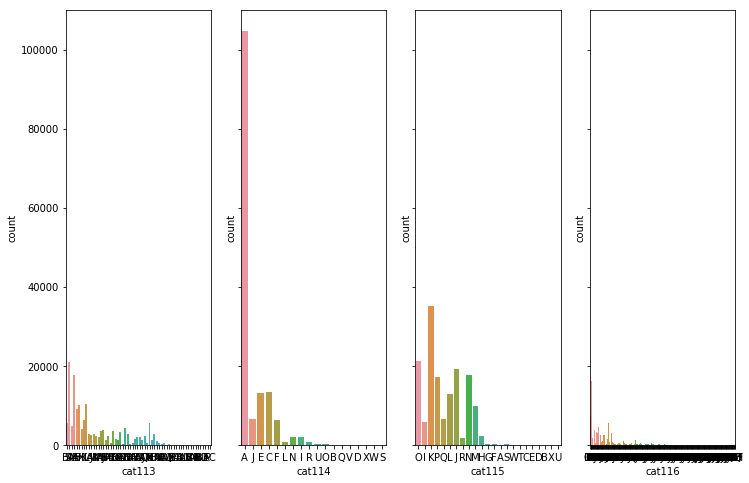

In [54]:
#names of all the columns
cols = train_data.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train_data, ax=ax[j])
plt.show()


Cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries.

Cat73 to cat 108 have more than two labels.

Cat109 to cat116 have many labels.

## Converting categorical features to numneric values
Since, all the models expect matrices consisting of numbers and not the alphabetical values, We need to convert the the values to corresponding numeric values. One problem in that is training set may contain categorical values not available in testing set and vice-versa. To solve it, we will merge the two datasets so that we can factorize theem easily.

In [55]:

#merging both the datasets to make single joined dataset
joined = pd.concat([train_data, test_data],ignore_index = True)
del train_data,test_data                                         #deleting previous one to save memory.

cat_feature = [n for n in joined.columns if n.startswith('cat')]  #list of all the features containing categorical values

#factorizing them
for column in cat_feature:
    joined[column] = pd.factorize(joined[column].values, sort=True)[0]
        
del cat_feature

In [56]:
# Let's visualize the first five entries of the dataset now.
print (joined.head(5))

   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  cat11  cat12  \
0     0     1     0     1     0     0     0     0     1      0      1      0   
1     0     1     0     0     0     0     0     0     1      1      0      0   
2     0     1     0     0     1     0     0     0     1      1      1      1   
3     1     1     0     1     0     0     0     0     1      0      0      0   
4     0     1     0     1     0     0     0     0     1      1      0      1   

   cat13  cat14  cat15  cat16  cat17  cat18  cat19  cat20  cat21  cat22  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      1      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat23  cat24  cat25  cat26  cat27  cat28  cat29  cat30  cat31  ca

## Bifurcating the joined data into training and testing data again

In [57]:
#extracting training and testing data form joined data
'''train_data = joined[joined['loss'].notnull()]
test_data = joined[joined['loss'].isnull()]
del joined
'''
train_data = joined.iloc[:150000,:]
test_data = joined.iloc[150000:,:]
print(test_data.shape)

(38318, 130)



## First Model - Linear Regression
In order, to get an idea of what range of score to expect, we first built a naive classifier using linear regression.

In [58]:
from sklearn.linear_model import LinearRegression           #importing the linear regression

#Set the base model
model = LinearRegression(n_jobs=-1)                         #setting n_jobs to -1 to use all cores available

model.fit(train_data,target)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

## Predicting the target variable of the test data
Now that our model is trained, we find the predictions of the test data

In [59]:

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_true,np.exp(model.predict(test_data))-shift)
print(error)

1267.4820890021144



So our linear regressor gives a score of 1267.4820890021144. Next, we create a XGBoost model and see how it fares as compared to this base score.
## Go to the next notebook